# Imports

In [1]:
import sys # system commands
import os # os.path module for working with file paths/directories

import numpy as np # numeric arrays
import pandas as pd # spreadsheet data
pd.options.display.max_rows = 100
pd.options.display.max_columns = 999
import scipy.stats as stats # statistical tests
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rcParams["pdf.fonttype"] = 42

## Steps to produce Plot 1 (Histogram)
### x axis = number of words recalled (0,1,2,3)
### y axis = percent of subjects
1. load cvlt spreadsheet into dataframe
1. subset only cued recall rows
1. subset categories
1. count number of recognized words per subject
1. create histogram


# Setup data

### Import spreadsheets into dataframe

In [2]:
print(os.path.exists(os.path.join(os.path.expanduser("~"), "Box")))
#os.chdir("c:\Users\cyballa\Box\")

True


In [3]:
proj_dir = os.path.join(os.path.expanduser("~"), "Box", "CVLT_analyses_Chinese")
infile = os.path.join(proj_dir, "cvlt-responses-formatted_131-subjects_2023-11-20.csv")
dat = pd.read_csv(infile)

In [55]:
fig_dir = os.path.join(os.path.expanduser("~"), "Documents", "code", "projects", "cvlt", "figs")
print(fig_dir, os.path.isdir(fig_dir))

C:\Users\cyballa\Documents\code\projects\cvlt\figs True


### Check name of tasks

In [4]:
# 
dat["task"].value_counts(dropna=True)

# write a function that subsets dat into dat_cued,
# which only has rows where trial == "cued_*"


task
free_recall    7390
recognition    3537
cued_recall    1243
Name: count, dtype: int64

### Subset only cued recall rows & separate by category

In [5]:
# subset cued recall
dat_cued = dat[dat["task"] == "cued_recall"]

## Save csv to file path

In [6]:
print(os.path.exists(os.path.join(os.path.expanduser("~"), "Documents")))

True


In [7]:
proj_local = os.path.join(os.path.expanduser("~"), "Documents", "code", "projects", "cvlt")

In [8]:
dat_cued_group = (
    dat_cued
    .query("field=='study_item'")
    .groupby(["subj", "trial"])
    ["rec"].sum()
).reset_index()
dat_cued_group.head()
dat_cued_group.to_csv()

',subj,trial,rec\r\n0,4670,cued_clothing,3\r\n1,4670,cued_fruit,0\r\n2,4670,cued_vehicles,2\r\n3,5380,cued_clothing,1\r\n4,5380,cued_fruit,2\r\n5,5380,cued_vehicles,0\r\n6,5451,cued_clothing,3\r\n7,5451,cued_fruit,3\r\n8,5451,cued_vehicles,3\r\n9,5844,cued_clothing,1\r\n10,5844,cued_fruit,3\r\n11,5844,cued_vehicles,1\r\n12,6760,cued_clothing,3\r\n13,6760,cued_fruit,3\r\n14,6760,cued_vehicles,3\r\n15,8180,cued_clothing,3\r\n16,8180,cued_fruit,3\r\n17,8180,cued_vehicles,3\r\n18,8247,cued_clothing,3\r\n19,8247,cued_fruit,3\r\n20,8247,cued_vehicles,3\r\n21,8280,cued_clothing,3\r\n22,8280,cued_fruit,3\r\n23,8280,cued_vehicles,3\r\n24,8420,cued_clothing,3\r\n25,8420,cued_fruit,3\r\n26,8420,cued_vehicles,3\r\n27,8421,cued_clothing,3\r\n28,8421,cued_fruit,3\r\n29,8421,cued_vehicles,3\r\n30,8422,cued_clothing,3\r\n31,8422,cued_fruit,3\r\n32,8422,cued_vehicles,3\r\n33,8435,cued_clothing,1\r\n34,8435,cued_fruit,1\r\n35,8435,cued_vehicles,3\r\n36,8495,cued_clothing,3\r\n37,8495,cued_fruit,3\r\n38,

### Subset of categories

In [9]:
dat_cued_fruit = dat_cued_group[dat_cued_group["trial"] == "cued_fruit"]# cued fruit only
dat_cued_clothing = dat_cued_group[dat_cued_group["trial"] == "cued_clothing"]  # cued clothing only
dat_cued_vehicles = dat_cued_group[dat_cued_group["trial"] == "cued_vehicles"]  # cued vehicles only

# Create plots

## Bar Graph
### Fruit

In [10]:
dat_cued_fruit["rec"].value_counts(dropna=True)

rec
3    82
2    27
1    15
0     7
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of fruit words recalled')

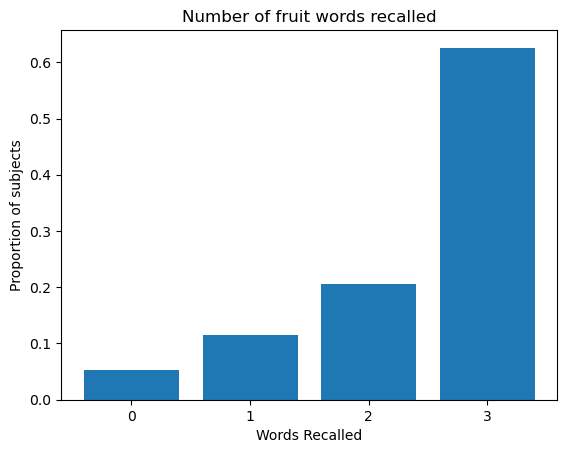

In [11]:
counts_fruit = ['0', '1', '2', '3']
subjects_fruit = [(7/131), (15/131), (27/131), (82/131)]  #number of subjects who recalled 0,1,2,3 words ]
count_label = ['0', '1', '2', '3']
fig, cued_fruit = plt.subplots()

cued_fruit.bar(counts_fruit, subjects_fruit, label=count_label)
cued_fruit.set_xlabel('Words Recalled')
cued_fruit.set_ylabel('Proportion of subjects')
cued_fruit.set_title('Number of fruit words recalled')

### Clothing

In [12]:
dat_cued_clothing["trial"].value_counts(dropna=True)

trial
cued_clothing    131
Name: count, dtype: int64

In [13]:
dat_cued_clothing["rec"].value_counts(dropna=True)

rec
3    66
2    32
1    21
0    12
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of clothing words recalled')

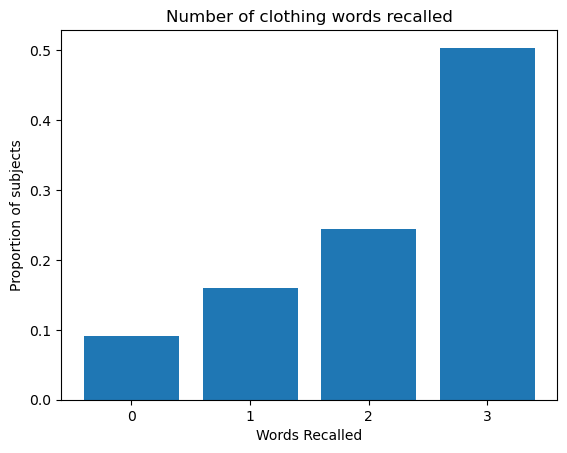

In [14]:
counts_clothing = ['0', '1', '2', '3']
subjects_clothing = [(12/131), (21/131), (32/131), (66/131)] 
count_label = ['0', '1', '2', '3']

fig, cued_clothing = plt.subplots()

cued_clothing.bar(counts_clothing, subjects_clothing, label=count_label)
cued_clothing.set_xlabel('Words Recalled')
cued_clothing.set_ylabel('Proportion of subjects')
cued_clothing.set_title('Number of clothing words recalled')

### Vehicles

In [15]:
dat_cued_vehicles["trial"].value_counts(dropna=True)

trial
cued_vehicles    131
Name: count, dtype: int64

In [16]:
dat_cued_vehicles["rec"].value_counts(dropna=True)

rec
3    91
2    25
0     9
1     6
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of vehicle words recalled')

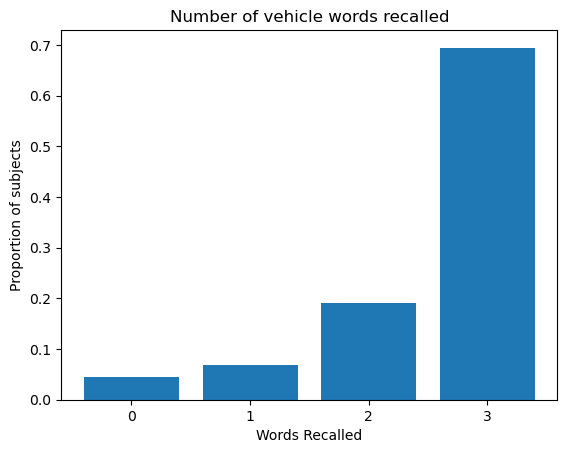

In [17]:
counts_vehicles = ['0', '1', '2', '3']
subjects_vehicles = [(6/131), (9/131), (25/131), (91/131)] 
count_label = ['0', '1', '2', '3']

fig, cued_vehicles = plt.subplots()

cued_vehicles.bar(counts_vehicles, subjects_vehicles, label=count_label)
cued_vehicles.set_xlabel('Words Recalled')
cued_vehicles.set_ylabel('Proportion of subjects')
cued_vehicles.set_title('Number of vehicle words recalled')

# Stacked Subplot

(0.0, 0.75)

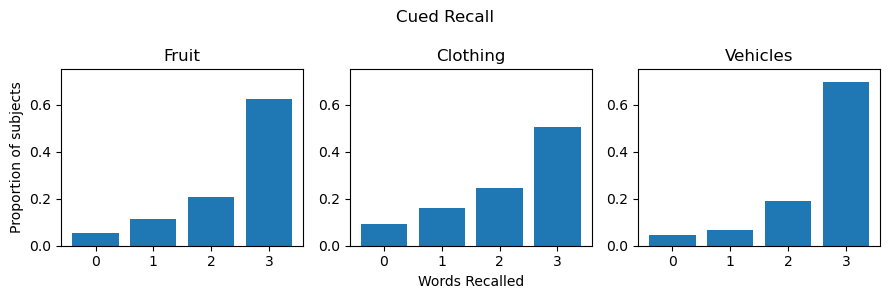

In [18]:
fig, (cued_fruit, cued_clothing, cued_vehicles) = plt.subplots(1,3, figsize=(9, 3), tight_layout=True)
fig.suptitle('Cued Recall')

cued_fruit.bar(counts_fruit, subjects_fruit, label=count_label)
cued_fruit.set_ylabel('Proportion of subjects')
cued_fruit.set_title('Fruit')
cued_fruit.set_ylim(0, 0.75)

cued_clothing.bar(counts_clothing, subjects_clothing, label=count_label)
cued_clothing.set_xlabel('Words Recalled')
cued_clothing.set_title('Clothing')
cued_clothing.set_ylim(0, 0.75)

cued_vehicles.bar(counts_vehicles, subjects_vehicles, label=count_label)
cued_vehicles.set_title('Vehicles')
cued_vehicles.set_ylim(0, 0.75)

# Cued Recall Grouped By Language

Subset cued categories into lanugages 


In [19]:
dat_cued_lang = (
    dat_cued
    .query("field=='study_item'")
    .groupby(["subj", "language", "trial"])
    ["rec"].sum()
).reset_index()
dat_cued_lang.head()
dat_cued_lang.to_csv()

',subj,language,trial,rec\r\n0,4670,cantonese,cued_clothing,3\r\n1,4670,cantonese,cued_fruit,0\r\n2,4670,cantonese,cued_vehicles,2\r\n3,5380,english,cued_clothing,1\r\n4,5380,english,cued_fruit,2\r\n5,5380,english,cued_vehicles,0\r\n6,5451,cantonese,cued_clothing,3\r\n7,5451,cantonese,cued_fruit,3\r\n8,5451,cantonese,cued_vehicles,3\r\n9,5844,english,cued_clothing,1\r\n10,5844,english,cued_fruit,3\r\n11,5844,english,cued_vehicles,1\r\n12,6760,mandarin,cued_clothing,3\r\n13,6760,mandarin,cued_fruit,3\r\n14,6760,mandarin,cued_vehicles,3\r\n15,8180,mandarin,cued_clothing,3\r\n16,8180,mandarin,cued_fruit,3\r\n17,8180,mandarin,cued_vehicles,3\r\n18,8247,english,cued_clothing,3\r\n19,8247,english,cued_fruit,3\r\n20,8247,english,cued_vehicles,3\r\n21,8280,english,cued_clothing,3\r\n22,8280,english,cued_fruit,3\r\n23,8280,english,cued_vehicles,3\r\n24,8420,english,cued_clothing,3\r\n25,8420,english,cued_fruit,3\r\n26,8420,english,cued_vehicles,3\r\n27,8421,cantonese,cued_clothing,3\r\n28,8421,

## Subset languages into categories

In [20]:
dat_engl_fruit = dat_cued_lang[(dat_cued_lang["trial"] == "cued_fruit") & (dat_cued_lang["language"] == "english")]
dat_mand_fruit = dat_cued_lang[(dat_cued_lang["trial"] == "cued_fruit") & (dat_cued_lang["language"] == "mandarin")]  
dat_cant_fruit = dat_cued_lang[(dat_cued_lang["trial"] == "cued_fruit") & (dat_cued_lang["language"] == "cantonese")] 

dat_engl_clothes = dat_cued_lang[(dat_cued_lang["trial"] == "cued_clothing") & (dat_cued_lang["language"] == "english")]
dat_mand_clothes = dat_cued_lang[(dat_cued_lang["trial"] == "cued_clothing") & (dat_cued_lang["language"] == "mandarin")]  
dat_cant_clothes = dat_cued_lang[(dat_cued_lang["trial"] == "cued_clothing") & (dat_cued_lang["language"] == "cantonese")] 

dat_engl_vehicles = dat_cued_lang[(dat_cued_lang["trial"] == "cued_vehicles") & (dat_cued_lang["language"] == "english")]
dat_mand_vehicles = dat_cued_lang[(dat_cued_lang["trial"] == "cued_vehicles") & (dat_cued_lang["language"] == "mandarin")]  
dat_cant_vehicles = dat_cued_lang[(dat_cued_lang["trial"] == "cued_vehicles") & (dat_cued_lang["language"] == "cantonese")] 

## Find counts of fruit words recalled

In [21]:
dat_engl_fruit["rec"].value_counts(dropna=True)

rec
3    31
2     8
1     2
Name: count, dtype: int64

In [22]:
dat_mand_fruit["rec"].value_counts(dropna=True)

rec
3    27
2    11
1     7
0     3
Name: count, dtype: int64

In [23]:
dat_cant_fruit["rec"].value_counts(dropna=True)

rec
3    24
2     8
1     6
0     4
Name: count, dtype: int64

(0.0, 40.0)

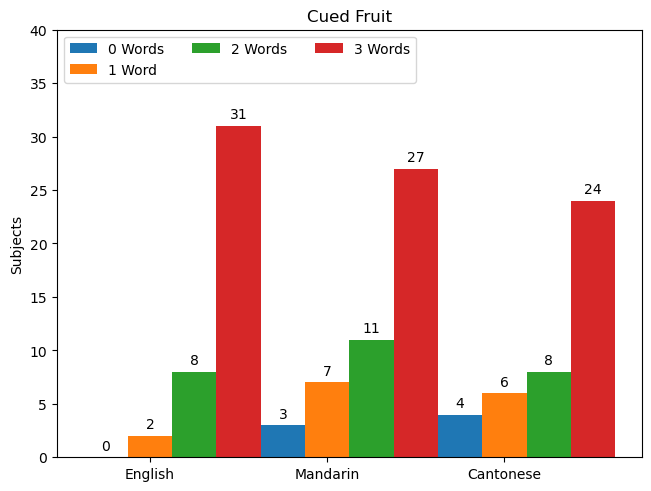

In [24]:
category_labels = ("English", "Mandarin", "Cantonese")
fruit_counts = {
    '0 Words': (0, 3, 4),
    '1 Word': (2, 7, 6),
    '2 Words': (8, 11, 8),
    '3 Words': (31, 27, 24),
}

x = np.arange(len(category_labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig1, ax = plt.subplots(layout='constrained')

for attribute, measurement in fruit_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Subjects')
ax.set_title('Cued Fruit')
ax.set_xticks(x + width, category_labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 40)

(0.0, 35.0)

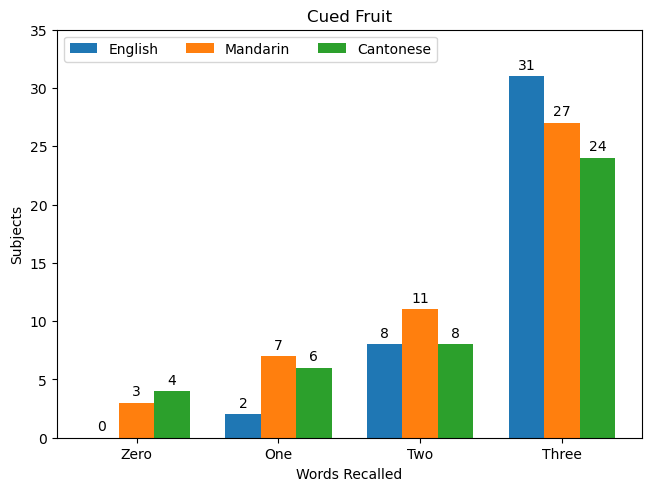

In [25]:
words_recalled = ("Zero", "One", "Two", "Three")
fruit_counts = {
    'English': (0, 2, 8, 31),
    'Mandarin': (3, 7, 11, 27),
    'Cantonese': (4, 6, 8, 24),
}

x = np.arange(len(words_recalled))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig2, ax = plt.subplots(layout='constrained')

for attribute, measurement in fruit_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Subjects')
ax.set_xlabel('Words Recalled')
ax.set_xticks(x + width, words_recalled) 
ax.set_title('Cued Fruit')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 35)

## Find counts of clothing words recalled

In [26]:
dat_engl_clothes["rec"].value_counts(dropna=True)

rec
3    27
2     7
1     5
0     2
Name: count, dtype: int64

In [27]:
dat_mand_clothes["rec"].value_counts(dropna=True)

rec
3    25
2    12
1     6
0     5
Name: count, dtype: int64

In [28]:
dat_cant_clothes["rec"].value_counts(dropna=True)

rec
3    14
2    13
1    10
0     5
Name: count, dtype: int64

(0.0, 35.0)

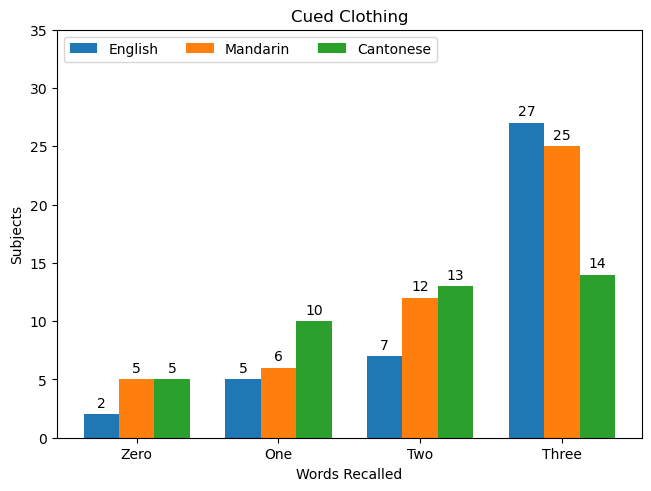

In [29]:
words_recalled = ("Zero", "One", "Two", "Three")
fruit_counts = {
    'English': (2, 5, 7, 27),
    'Mandarin': (5, 6, 12, 25),
    'Cantonese': (5, 10, 13, 14),
}

x = np.arange(len(words_recalled))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig3, ax = plt.subplots(layout='constrained')

for attribute, measurement in fruit_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Subjects')
ax.set_xlabel('Words Recalled')
ax.set_xticks(x + width, words_recalled) 
ax.set_title('Cued Clothing')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 35)

## Find counts of vehicles words recalled

In [30]:
dat_engl_vehicles["rec"].value_counts(dropna=True)

rec
3    26
2    10
0     3
1     2
Name: count, dtype: int64

In [31]:
dat_mand_vehicles["rec"].value_counts(dropna=True)

rec
3    35
2     7
0     4
1     2
Name: count, dtype: int64

In [32]:
dat_cant_vehicles["rec"].value_counts(dropna=True)

rec
3    30
2     8
0     2
1     2
Name: count, dtype: int64

(0.0, 40.0)

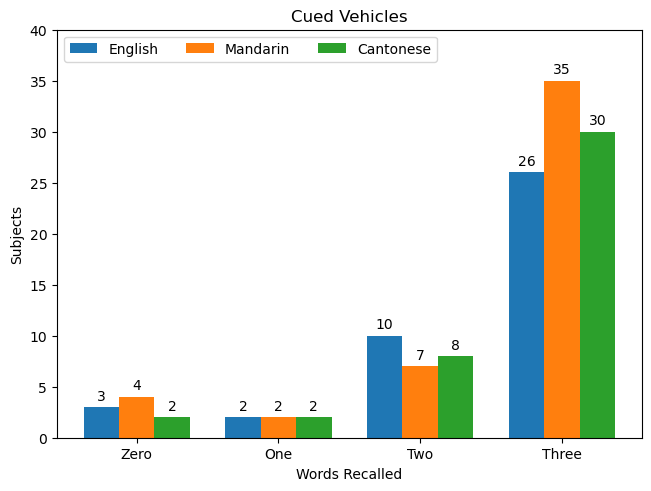

In [36]:
words_recalled = ("Zero", "One", "Two", "Three")
fruit_counts = {
    'English': (3, 2, 10, 26),
    'Mandarin': (4, 2, 7, 35),
    'Cantonese': (2, 2, 8, 30),
}

x = np.arange(len(words_recalled))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig4, ax = plt.subplots(layout='constrained')

for attribute, measurement in fruit_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Subjects')
ax.set_xlabel('Words Recalled')
ax.set_xticks(x + width, words_recalled) 
ax.set_title('Cued Vehicles')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 40)

## Example subplot code (Daniel)

In [50]:
import datetime
def today():
    """Return today's date like YYYY-MM-DD."""
    return datetime.date.today().strftime("%Y-%m-%d")

today()

'2023-12-19'

C:\Users\cyballa\AppData\Local\Temp\1\ipykernel_25860\3545061405.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Saved C:\Users\cyballa\Documents\code\projects\cvlt\figs\name_for_this_plot_2023-12-19.pdf


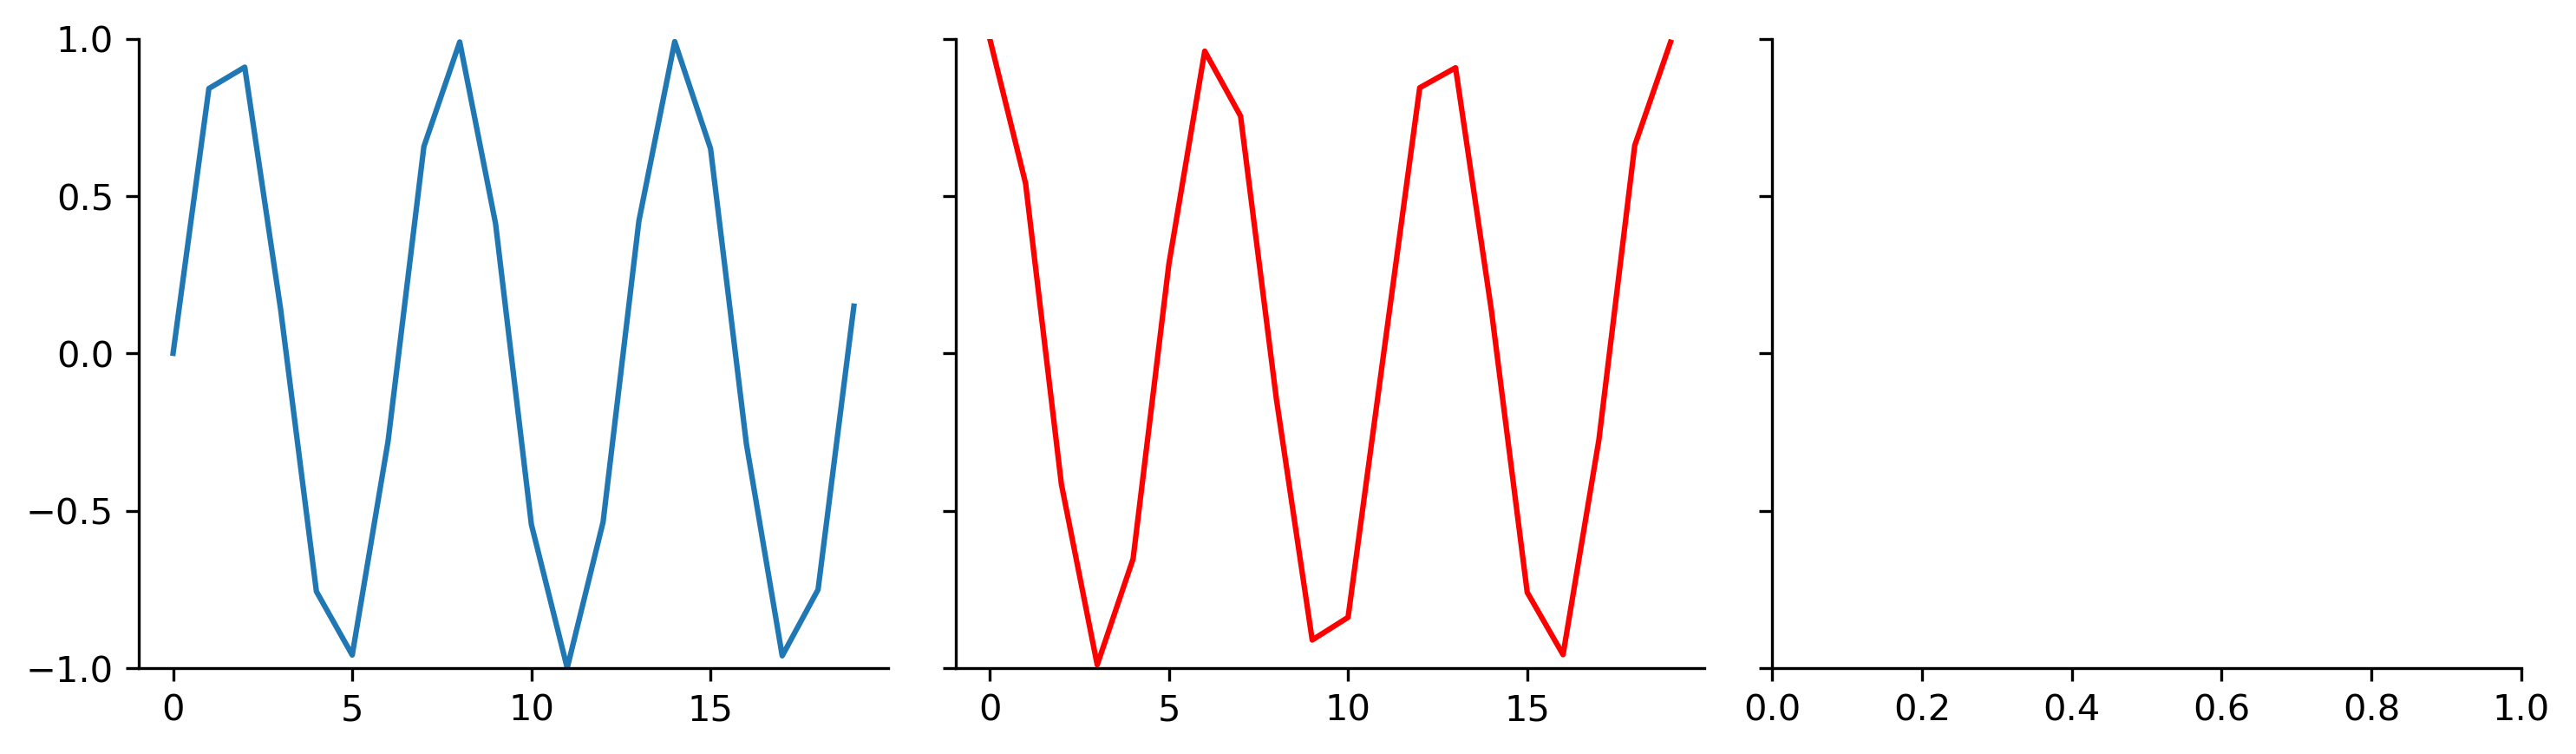

In [57]:
ymin = -1
ymax = 1
yticks = np.arange(-1, 1.01, step=0.5)
save_fig = True
overwrite = True
# presumably some fig_dir exists in scope, if not define here

# -----------------------------------
fig, ax = plt.subplots(1, 3, dpi=300, figsize=(10, 3))
ax = np.ravel(ax)

fig.show()

# Plot a sine wave
iax = 0
_ax = ax[iax]
_ax.plot(np.arange(20), np.sin(np.arange(20)))

# Plot a cosine wave
iax += 1 # iax = iax + 1
_ax = ax[iax]
_ax.plot(np.arange(20), np.cos(np.arange(20)), color="r")

# Format the figure
for iax, _ax in enumerate(ax):
    _ax.spines[["right", "top"]].set_visible(False)
    _ax.set_ylim([ymin, ymax])
    _ax.set_yticks(yticks)
    if iax > 0:
        _ax.set_yticklabels(["" for _ in yticks])

fig.tight_layout()

# Save the figure
if save_fig:
    outfile = os.path.join(fig_dir, "name_for_this_plot_{}.pdf".format(today()))
    if overwrite or not os.path.exists(outfile):
        fig.savefig(outfile, pad_inches=0)
        print(f"Saved {outfile}")

# Probability of Recalled Word 


### 1 word recalled

### 2 words recalled

# Correlation Between Cued Recall Categories

In [60]:
dat_cued_groupw = pd.pivot(index="subj", columns="trial", values="rec", data=dat_cued_group)

dat_cued_groupw.head(10)

trial,cued_clothing,cued_fruit,cued_vehicles
subj,,,
4670,3,0,2
5380,1,2,0
5451,3,3,3
5844,1,3,1
6760,3,3,3
8180,3,3,3
8247,3,3,3
8280,3,3,3
8420,3,3,3


<Axes: >

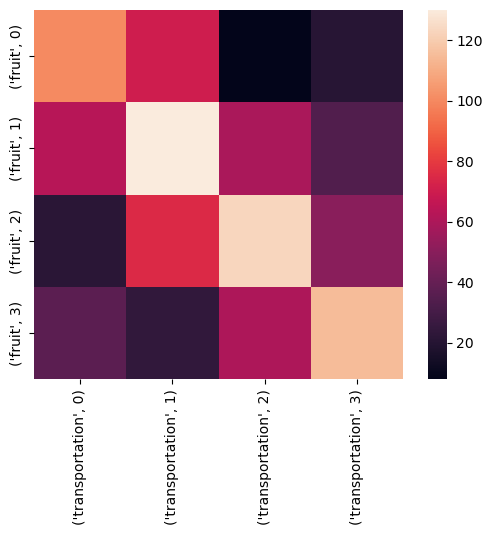

In [34]:
# Simulate a positive correlation between number of fruit and
# number of transpo words recalled across subjects
# (values show the number of subjects in each bin) 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fruits = [("fruit", 0), ("fruit", 1), ("fruit", 2), ("fruit", 3)]
transpo = [
    ("transportation", 0),
    ("transportation", 1),
    ("transportation", 2),
    ("transportation", 3),
]
df = pd.DataFrame(np.zeros((4, 4)), index=fruits, columns=transpo)

# Positive correlation
df.loc[:, :] = np.random.rand(16).reshape([4, 4]) * 40
df.iloc[0, 0] = 100
df.iloc[1, 1] = 130
df.iloc[2, 2] = 123
df.iloc[3, 3] = 115
df.iloc[0, 1] = 70
df.iloc[1, 0] = 63
df.iloc[1, 2] = 59
df.iloc[2, 1] = 75
df.iloc[2, 3] = 50
df.iloc[3, 2] = 60
sns.heatmap(df, square=True) 